<b><font size=6>Содержание</font></b><a name="1common."></a>
* [0. Описание проекта](#0.)
* [1. Описание данных](#1.)
* [2. Предобработка данных](#2.)
    * [2.1. Обработка пропусков](#2.1.)
    * [2.2. Изменение типов данных](#2.2.)
    * [2.3. Добавление новых данных](#2.3.)
* [3. Исследовательский анализ данных](#3.)
    * [3.1. Анализ выпуска игр в разбивке по годам и платформам](#3.1.)
    * [3.2. Анализ платформ за актуальный период](#3.2.)
    * [3.3. Продажи наиболее популярной платформы PS4](#3.3.)
    * [3.4. Анализ жанров](#3.4.)
* [4. Составление портрета пользователя каждого региона](#4.)
* [5. Проверка гипотез](#5.)
    * [5.1. Гипотеза о равенстве средних пользовательских рейтингов платформ Xbox One и PC](#5.1.)
    * [5.2. Гипотеза о равенстве средних пользовательских рейтингов жанров Action и Sports](#5.2.)
* [6. Общий вывод](#6.)



<b><font size=5>Выявление закономерностей для успешности игры</font></b><a name="0."></a><br/>
[<font size="2">к содержанию</font>](#1common.)

Интернет-магазин «Стримчик» продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные до 2016г. о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). 

*Цели:*
1. Выявить определяющие успешность игры закономерности, что позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании на 2017г.
2. Проверить гипотезы: 
    * средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
    * средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.


<b><font size=5>1. Описание данных</font></b><a name="1."></a><br/>
[<font size="2">(к содержанию)</font>](#1common.)

In [1]:
# раскомментируйте код в этой ячейке, если у вас не установлена библиотека termcolor

# conda install -c omnia termcolor

In [2]:
# импорт всех необходимых библиотек

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

from termcolor import colored

import warnings
warnings.filterwarnings('ignore')

In [3]:
# загружаем данные

games = pd.read_csv('/datasets/games.csv')

<b><font size=3>Описание данных:</font></b>

* Name — название игры
* Platform — платформа
* Year_of_Release — год выпуска
* Genre — жанр игры
* NA_sales — продажи в Северной Америке (миллионы проданных копий)
* EU_sales — продажи в Европе (миллионы проданных копий)
* JP_sales — продажи в Японии (миллионы проданных копий)
* Other_sales — продажи в других странах (миллионы проданных копий)
* Critic_Score — оценка критиков (максимум 100)
* User_Score — оценка пользователей (максимум 10)
* Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию:
    * «EC» («Early childhood») — «Для детей младшего возраста»: Игра подходит для детей от 3 лет и старше.
    * «E» («Everyone») — «Для всех»: Содержание вполне подходит для возрастной категории от 6 лет и старше.
    * «E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше».
    * «T» («Teen») — «Подросткам»: Игра подходит для лиц от 13 лет и старше.
    * «M» («Mature») — «Для взрослых»: Материалы игры не подходят для подростков младше 17 лет. 
    * «AO» («Adults Only 18+») — «Только для взрослых».
    * «RP» («Rating Pending») — «Рейтинг ожидается»: Продукт был отправлен в ESRB и ожидает присвоения рейтинга. Данный логотип используется только на рекламных презентациях и в демо-версиях игр до официальной даты выпуска в продажу.

Данные за 2016 год могут быть неполными.

In [4]:
def general_info(data):
    ''' 
    Функция принимает на вход датафрейм и возвращает общую информацию о данных.
    '''
    print('Случайные 5 строк датафрейма')
    print('----------------------------')
    display(data.sample(5, random_state=42)) # выводим на экран рандомные 5 строк датафрейма
    print('Общая информация')
    print('----------------')
    display(data.info())
    print('Пропуски')
    print('--------')
    display(pd.DataFrame(round(data.isna().mean()*100,2)).style.background_gradient('coolwarm')) # выводим процент пропусков 
                                                                                                 # по каждому столбцу
    print('Дубликаты')
    print('---------')
    display(data.duplicated().sum())
    print('Описательная статистика')
    print('-----------------------')
    display(round(data.describe(), 2))

In [5]:
general_info(games)

Случайные 5 строк датафрейма
----------------------------


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
3485,London 2012: The Official Video Game of the Ol...,X360,2012.0,Sports,0.07,0.44,0.00,0.07,NaN,NaN,NaN
5500,Etrian Odyssey,DS,2007.0,Role-Playing,0.19,0.02,0.09,0.02,75.0,8.5,T
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN
9489,RollerCoaster Tycoon,XB,2003.0,Strategy,0.10,0.03,0.00,0.00,62.0,8.3,E
12993,Rhapsody: A Musical Adventure,DS,2008.0,Role-Playing,0.05,0.00,0.00,0.00,67.0,6.8,E


Общая информация
----------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


None

Пропуски
--------


,0
Name,0.01
Platform,0
Year_of_Release,1.61
Genre,0.01
NA_sales,0
EU_sales,0
JP_sales,0
Other_sales,0
Critic_Score,51.32
User_Score,40.09


Дубликаты
---------


0

Описательная статистика
-----------------------


,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.00,16715.00,16715.00,16715.00,16715.00,8137.00
mean,2006.48,0.26,0.15,0.08,0.05,68.97
std,5.88,0.81,0.50,0.31,0.19,13.94
min,1980.00,0.00,0.00,0.00,0.00,13.00
25%,2003.00,0.00,0.00,0.00,0.00,60.00
50%,2007.00,0.08,0.02,0.00,0.01,71.00
75%,2010.00,0.24,0.11,0.04,0.03,79.00
max,2016.00,41.36,28.96,10.22,10.57,98.00


<b><font size=3>Промежуточный вывод:</font></b><br/>

*Названия столбцов:*<br/>
Названия столбцов приведем к нижнему регистру.

*Пропуски:* 

* Пропуски в столбцах Name, Year_of_Release и Genre удалим, т.к. они составляют менее 2% от всего датасета.
* Пропуски в столбцах Critic_Score, User_Score, Rating пока оставим, потому что их довольно много, по 40-50%. Возможно, пропуски появились у тех игр, которые выпущены в 80е-90е годы и рейтинга по ним нет, т.к. они устарели. Еще одна причина пропусков - это не популярные игры, в которые мало играют. Либо в выгрузке произошел сбой и рейтинг потерялся.

*Типы данных:*

* Название игры и жанр изменим с object на тип category для уменьшения объема потребляемой памяти.
* Year_of_Release - год выпуска игры преобразуем из float в int.
* NA_sales, EU_sales, JP_sales, Other_sales, User_Score заменим на соответствующие типы методом pd.to_numeric для уменьшения объема потребляемой памяти.

В датасете игры с 1980 года выпуска до 2016г. Основная часть игр 75% - до 2010г выпуска. В столбцах NA_sales, EU_sales, JP_sales большая разница между максимальным и минимальным значениями. Причем 75% данных лежат в пределах до 0.1-0.2 млн. проданных копий, а максимум равен от 10-41 млн. Скорее всего это выбросы. Посмотрим на них поближе в блоке "Исследовательский анализ данных".

Дубликатов нет.


<b><font size=5>2. Предобработка данных</font></b><a name="2."></a>

<b><font size=4>2.1. Обработка пропусков</font></b><a name="2.1."></a><br/>
[<font size="2">(к содержанию)</font>](#1common.)

In [6]:
# приведем названия столбцов к нижнему регистру
games.columns = games.columns.str.lower()

# удалим пропуски в столбцах Name, Year_of_Release и Genre
games.dropna(subset=['name', 'year_of_release', 'genre'], inplace=True)

In [7]:
# проверка

display(pd.DataFrame(round(games.isna().mean()*100,2)).style.background_gradient('coolwarm'))
print('Кол-во записей после удаления пропусков:', games.shape[0])

,0
name,0
platform,0
year_of_release,0
genre,0
na_sales,0
eu_sales,0
jp_sales,0
other_sales,0
critic_score,51.45
user_score,40.17


Кол-во записей после удаления пропусков: 16444


Проверим симметричны ли пропуски в столбцах user_score, rating и critic_score.

In [8]:
print('Кол-во пропусков в столбце user_score:', games['user_score'].isna().sum())
print('Кол-во пропусков в столбце rating:', games['rating'].isna().sum())
print('Кол-во пропусков в столбце critic_score:', games['critic_score'].isna().sum())

Кол-во пропусков в столбце user_score: 6605
Кол-во пропусков в столбце rating: 6676
Кол-во пропусков в столбце critic_score: 8461


In [9]:
# строки с пропусками в столбцах critic_score, user_score, rating

print('Таблица с пропусками в столбцах user_score, rating и critic_score')
print('-----------------------------------------------------------------')
games.loc[games['user_score'].isna() & games['rating'].isna() & games['critic_score'].isna()]

Таблица с пропусками в столбцах user_score, rating и critic_score
-----------------------------------------------------------------


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
12,Pokemon Gold/Pokemon Silver,GB,1999.0,Role-Playing,9.00,6.18,7.20,0.71,NaN,NaN,NaN
18,Super Mario World,SNES,1990.0,Platform,12.78,3.75,3.54,0.55,NaN,NaN,NaN
20,Pokemon Diamond/Pokemon Pearl,DS,2006.0,Role-Playing,6.38,4.46,6.04,1.36,NaN,NaN,NaN
21,Super Mario Land,GB,1989.0,Platform,10.83,2.71,4.18,0.42,NaN,NaN,NaN
22,Super Mario Bros. 3,NES,1988.0,Platform,9.54,3.44,3.84,0.46,NaN,NaN,NaN


>В подавляющем большинстве пропуски симментричны. Там где не заполнен user_score, то и в rating, critic_score скорее всего будут пропуски. Но не всегда.<br/>
Пропуски есть у разных игр, выпущенных в разные года.

In [10]:
print('Таблица с пропусками в user_score и непустыми значениями в rating')
print('-----------------------------------------------------------------')
games.loc[(~games['user_score'].isna()) & games['rating'].isna()] # игры, у которых user_score заполнен, а rating нет

Таблица с пропусками в user_score и непустыми значениями в rating
-----------------------------------------------------------------


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
693,Tomb Raider II,PC,1997.0,Action,0.91,1.25,0.00,0.13,NaN,8.3,NaN
822,R4: Ridge Racer Type 4,PS,1998.0,Racing,0.68,0.46,0.79,0.13,88.0,9.2,NaN
1763,Football Manager 2013,PC,2012.0,Sports,0.00,0.95,0.00,0.21,86.0,6.7,NaN
2054,Monster Rancher,PS,1997.0,Simulation,0.12,0.08,0.74,0.07,86.0,8.3,NaN
2843,Jampack Winter 2001,PS2,2001.0,Misc,0.35,0.28,0.00,0.09,NaN,tbd,NaN
3054,100 Classic Books,DS,2008.0,Misc,0.12,0.52,0.00,0.02,70.0,6,NaN
3523,Jampack Summer 2002,PS2,2002.0,Misc,0.28,0.22,0.00,0.07,NaN,tbd,NaN
3647,LEGO Dimensions,PS3,2015.0,Action,0.17,0.30,0.00,0.09,NaN,6.4,NaN
3794,LEGO Dimensions,X360,2015.0,Action,0.26,0.23,0.00,0.04,NaN,6.1,NaN
3922,Petz: Hamsterz Life 2,DS,2007.0,Misc,0.47,0.00,0.00,0.04,NaN,tbd,NaN


>Интересно, что нашлась игра, у которой в столбце user_score стоит не цифра, а значение "tbd". Позже посмотрим сколько игр с таким значением.<br/>
А пока посмотрим пропуски в разбивке по годам.

In [11]:
# Посмотрим в разбивке по годам пропуски
print('Пропуски в разюивке по годам')
print('----------------------------')
(games.loc[games['user_score'].isna()]
               .groupby('year_of_release', as_index=False)
               .agg({'name':'count'})
               .sort_values(by='name', ascending=False)
              )


Пропуски в разюивке по годам
----------------------------


,year_of_release,name
30,2010.0,457
28,2008.0,440
31,2011.0,418
29,2009.0,407
27,2007.0,376
18,1998.0,348
26,2006.0,330
19,1999.0,299
32,2012.0,290
35,2015.0,271


>Много пропусков и в 2000х годах и в 90х. Оставим их без обработки. Посмотрим столбец user_score со значением "tbd".

In [12]:
print('Игры с рейтингом tbd')
print('--------------------')
games.loc[games['user_score'] == 'tbd'] # игры с рейтингом 'tbd'

Игры с рейтингом tbd
--------------------


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010.0,Sports,3.45,2.59,0.00,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005.0,Misc,2.08,1.35,0.00,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011.0,Sports,1.51,1.03,0.00,0.27,NaN,tbd,T
645,uDraw Studio,Wii,2010.0,Misc,1.65,0.57,0.00,0.20,71.0,tbd,E
718,Just Dance Kids,Wii,2010.0,Misc,1.52,0.54,0.00,0.18,NaN,tbd,E
726,Dance Dance Revolution X2,PS2,2009.0,Simulation,1.09,0.85,0.00,0.28,NaN,tbd,E10+
821,The Incredibles,GBA,2004.0,Action,1.15,0.77,0.04,0.10,55.0,tbd,E
881,Who wants to be a millionaire,PC,1999.0,Misc,1.94,0.00,0.00,0.00,NaN,tbd,E
1047,Tetris Worlds,GBA,2001.0,Puzzle,1.25,0.39,0.00,0.06,65.0,tbd,E
1048,Imagine: Teacher,DS,2008.0,Simulation,0.70,0.82,0.00,0.19,NaN,tbd,E


>2376 игр с таким рейтингом. Гугл пишет, что аббревиатура tbd означает - рейтинг еще не определен. В столбце user_score максимальная оценка равна 10. Поэтому заполним пропуски значением 999, а значение tbd заменим на число 100. После этого можно будет преобразовать тип с object в float. <br/>
Заполним пропуски в столбце critic_score также значением 999, потому что идейно user_score u critic_score — это одно и то же.

In [13]:
games.loc[games['user_score']=='tbd', 'user_score'] = 100
games.loc[games['user_score'].isna(), 'user_score'] = 999
games.loc[games['critic_score'].isna(), 'critic_score'] = 999

In [14]:
# посмотрим на пропуски в столбце rating
print('Пропуски в столбце rating')
print('-------------------------')
games.query('rating != rating')

Пропуски в столбце rating
-------------------------


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,999.0,999,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,999.0,999,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,999.0,999,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,999.0,999,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,999.0,999,NaN
12,Pokemon Gold/Pokemon Silver,GB,1999.0,Role-Playing,9.00,6.18,7.20,0.71,999.0,999,NaN
18,Super Mario World,SNES,1990.0,Platform,12.78,3.75,3.54,0.55,999.0,999,NaN
20,Pokemon Diamond/Pokemon Pearl,DS,2006.0,Role-Playing,6.38,4.46,6.04,1.36,999.0,999,NaN
21,Super Mario Land,GB,1989.0,Platform,10.83,2.71,4.18,0.42,999.0,999,NaN
22,Super Mario Bros. 3,NES,1988.0,Platform,9.54,3.44,3.84,0.46,999.0,999,NaN


>В столбце rating 6676 пропусков. Видим, что пропуски есть в разные года, по разным платформам. Посмотрим пропуски в разбивке по годам.

In [15]:
print('Количество пропусков в столбце rating в разбивке по годам')
print('---------------------------------------------------------')
games.loc[games['rating'].isna()].groupby('year_of_release')['name'].count().sort_values(ascending=False)

Количество пропусков в столбце rating в разбивке по годам
---------------------------------------------------------


year_of_release
2010.0    456
2008.0    446
2011.0    433
2009.0    415
2007.0    376
1998.0    347
2006.0    328
2012.0    298
1999.0    296
2015.0    291
1997.0    270
1996.0    256
2014.0    236
2005.0    233
2013.0    228
2016.0    222
1995.0    219
2000.0    202
2002.0    174
2004.0    164
2003.0    162
2001.0    143
1994.0    120
1993.0     60
1981.0     46
1992.0     41
1991.0     41
1982.0     36
1986.0     21
1983.0     17
1989.0     17
1990.0     16
1987.0     16
1984.0     14
1988.0     14
1985.0     13
1980.0      9
Name: name, dtype: int64

>Видим, что пропусков также много в 2000х и 90х годах. Заполним пропуски значением 'no rating ESRB'.

In [16]:
#заполним пропуски в столбце rating значением 'no rating ESRB'
games['rating'] = games['rating'].fillna('no rating ESRB')

# посчитаем число одинаковых строк, если такие есть
print(f"Количество дубликатов после обработки пропусков: {games.duplicated().sum()}")


Количество дубликатов после обработки пропусков: 0


<b><font size=3>Промежуточный вывод:</font></b><br/>

* Удалены пропуски в столбцах Name, Year_of_Release и Genre, т.к. они составляли менее 2% от всего датасета. <br/>
* Увидели симметричность пропусков в столбцах user_score, rating и critic_score в большинстве случаев. Пропуски есть по разным платформам, в разные года. Оставили пропуски без изменений в столбце critic_score, т.к. их более 50% и они имеют тип float.
* Пропуски в столбце rating заполнили значением 'no rating ESRB', тем самым добавив информацию о том, что не знаем возрастного ограничения по конкретной игре.
* В столбце user_score помимо пропусков нашли значение tbd, которое означает "рейтинг не определен". Всего 2376 игр с неопределенным рейтингом. Года выпуска у этих игр тоже разные. Для того, чтобы преобразовать тип столбца в числовой было решено заменить пропуски значением 999, а tbd на 100.
* Дубликатов не обнаружено.

<b><font size=4>2.2. Изменение типов данных</font></b><a name="2.2."></a><br/>
[<font size="2">(к содержанию)</font>](#1common.)

In [17]:
# заменим тип в столбце user_score с object на float

games['user_score'] = pd.to_numeric(games['user_score'], downcast='float')

In [18]:
# посмотрим какие бывают платформы

print('Список всех названий платформ')
print('-----------------------------')
games['platform'].value_counts()

Список всех названий платформ
-----------------------------


PS2     2127
DS      2121
PS3     1306
Wii     1286
X360    1232
PSP     1193
PS      1190
PC       957
GBA      811
XB       803
GC       542
3DS      512
PSV      429
PS4      392
N64      316
XOne     247
SNES     239
SAT      173
WiiU     147
2600     116
NES       98
GB        97
DC        52
GEN       27
NG        12
WS         6
SCD        6
3DO        3
TG16       2
GG         1
PCFX       1
Name: platform, dtype: int64

>Все названия платформ пишутся большими буквами. Одинаковых платформ, написанных по-разному, нет.<br/>
Посмотрим какие бывают жанры.

In [19]:
print('Список всех названий жанров')
print('---------------------------')
games['genre'].value_counts()

Список всех названий жанров
---------------------------


Action          3307
Sports          2306
Misc            1721
Role-Playing    1481
Shooter         1296
Adventure       1293
Racing          1226
Platform         878
Simulation       857
Fighting         837
Strategy         673
Puzzle           569
Name: genre, dtype: int64

>Одинаковых жанров, но написанных по-разному, нет. Поэтому можем изменить тип столбцов: жанр, имя. Тип у платформы менять на category не будем, т.к. в дальнейшем хотим получить статистику только по выбранным платформам,а не по всем категориям.

In [20]:
#замена типов с object на category
games['name'] = games['name'].astype('category')
games['genre'] = games['genre'].astype('category')

# заменим тип в столбце year_of_release на int
games['year_of_release'] = games['year_of_release'].astype(int)

In [21]:
def astype_columns(data):
    '''
    Функция меняет тип только столбцов с типами int и float на более подходящий (но занимающий меньший объем памяти).
    '''
    columns_int = data.select_dtypes(include=['int']).columns # выбираем из датасета все столбцы с типом int
    data.loc[:, columns_int] = data.loc[:, columns_int].apply(pd.to_numeric, downcast='integer') # меняем тип
    
    columns_float = data.select_dtypes(include=['float']).columns # аналогично, выбираем с типом float
    data.loc[:, columns_float] = data.loc[:, columns_float].apply(pd.to_numeric, downcast='float') # меняем тип
    

In [22]:
# заменяем типы данных с помощью написанной выше функции

astype_columns(games)

In [23]:
# проверка

games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
name               16444 non-null category
platform           16444 non-null object
year_of_release    16444 non-null int16
genre              16444 non-null category
na_sales           16444 non-null float32
eu_sales           16444 non-null float32
jp_sales           16444 non-null float32
other_sales        16444 non-null float32
critic_score       16444 non-null float32
user_score         16444 non-null float32
rating             16444 non-null object
dtypes: category(2), float32(6), int16(1), object(2)
memory usage: 1.2+ MB


<b><font size=3>Промежуточный вывод:</font></b><br/>

* Изменили типы данных в столбцах name, genre с object на category.
* В столбце user_score с object на float.
* Также заменили типы только тех столбцов с типами int и float на более подходящий (но занимающий меньший объем памяти).

В итоге объем потребляемой памяти уменьшился с 1.4Мб до 1.2Мб.

<b><font size=4>2.3. Добавление новых данных</font></b><a name="2.3."></a><br/>
[<font size="2">(к содержанию)</font>](#1common.)

In [24]:
# посчитаем суммарные продажи во всех регионах и добавим их в отдельный столбец

games['all_sales'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']

In [25]:
print('Таблица с добавленным столбцом по суммарным продажам')
print('----------------------------------------------------')
games.head(10)

Таблица с добавленным столбцом по суммарным продажам
----------------------------------------------------


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
0,Wii Sports,Wii,2006,Sports,41.360001,28.959999,3.77,8.45,76.0,8.0,E,82.539993
1,Super Mario Bros.,NES,1985,Platform,29.080000,3.580000,6.81,0.77,999.0,999.0,no rating ESRB,40.240002
2,Mario Kart Wii,Wii,2008,Racing,15.680000,12.760000,3.79,3.29,82.0,8.3,E,35.520000
3,Wii Sports Resort,Wii,2009,Sports,15.610000,10.930000,3.28,2.95,80.0,8.0,E,32.770000
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.270000,8.890000,10.22,1.00,999.0,999.0,no rating ESRB,31.380001
5,Tetris,GB,1989,Puzzle,23.200001,2.260000,4.22,0.58,999.0,999.0,no rating ESRB,30.260000
6,New Super Mario Bros.,DS,2006,Platform,11.280000,9.140000,6.50,2.88,89.0,8.5,E,29.799999
7,Wii Play,Wii,2006,Misc,13.960000,9.180000,2.93,2.84,58.0,6.6,E,28.910000
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.440000,6.940000,4.70,2.24,87.0,8.4,E,28.319998
9,Duck Hunt,NES,1984,Shooter,26.930000,0.630000,0.28,0.47,999.0,999.0,no rating ESRB,28.309999


<b><font size=5>3. Исследовательский анализ данных</font></b><a name="3."></a><br/>

<b><font size=4>3.1. Анализ выпуска игр в разбивке по годам и платформам</font></b><a name="3.1."></a><br/>
[<font size="2">(к содержанию)</font>](#1common.)

Посмотрим, сколько игр выпускалось в разные годы.

In [26]:
platform_count = games.pivot_table(index='year_of_release',
                                   values='name',
                                   aggfunc='count').reset_index()
print('Кол-во выпущенных игр в разбивке по годам')
print('-----------------------------------------')
platform_count

Кол-во выпущенных игр в разбивке по годам
-----------------------------------------


,year_of_release,name
0,1980,9
1,1981,46
2,1982,36
3,1983,17
4,1984,14
5,1985,14
6,1986,21
7,1987,16
8,1988,15
9,1989,17


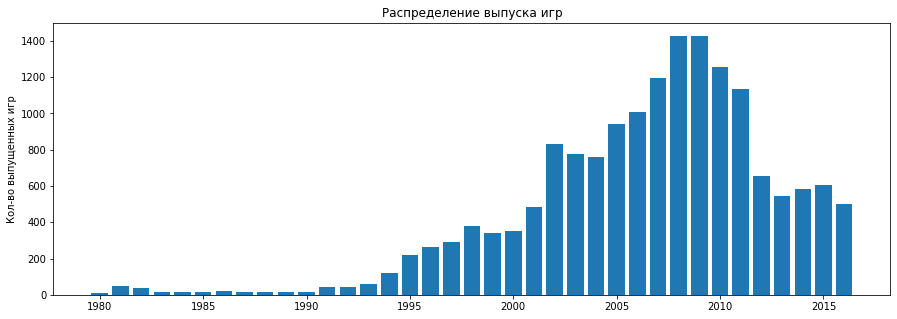

In [27]:
# для наглядности построим распределение выпуска игр по годам в разбивке по платформам

plt.figure(figsize =(15, 5))
plt.bar(platform_count['year_of_release'], platform_count['name'])
plt.xlabel('')
plt.ylabel('Кол-во выпущенных игр')
plt.title('Распределение выпуска игр');

>До 1994г выпускалось менее 100 игр в год. Начиная с 1994 по 2001гг выпускают по 120-480 игр в год. 
Затем с 2002 по 2011гг начинают выпускать в среднем от 1000 игр в год. И с 2012г идет спад выпуска, в среднем по 500-600 игр.<br/>
Проанализируем продажи игр по каждой платформе.

In [28]:
# посчитаем все общие продажи для каждой платформы
pivot_games_platform = games.pivot_table(index='platform',
                                        values='all_sales',
                                        aggfunc=('sum', 'count')).sort_values(by='sum', ascending=False)
pivot_games_platform.columns = ['games_count', 'all_sales']

print('Кол-во выпущенных игр и сумма проданных копий игр в разбивке по платформам')
print('--------------------------------------------------------------------------')
pivot_games_platform

Кол-во выпущенных игр и сумма проданных копий игр в разбивке по платформам
--------------------------------------------------------------------------


,games_count,all_sales
platform,,
PS2,2127,1233.559937
X360,1232,961.239990
PS3,1306,931.339966
Wii,1286,891.179993
DS,2121,802.780029
PS,1190,727.580017
PS4,392,314.140015
GBA,811,312.880005
PSP,1193,289.529999


Посмотрим на график.

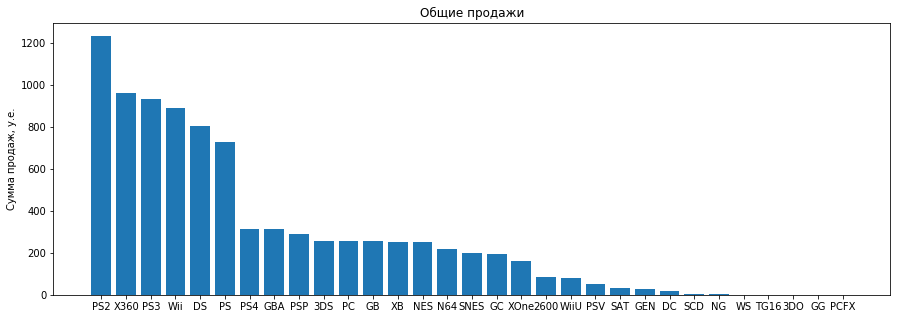

In [29]:
plt.figure(figsize =(15, 5))
plt.bar(pivot_games_platform.index.values, pivot_games_platform['all_sales'])
plt.xlabel('')
plt.ylabel('Сумма продаж, у.е.')
plt.title('Общие продажи');

>Первые 6 платформ имеют максимальные продажи по всему миру за все годы. Но если заглянуть в википедию, то увидим, что PS2 прекратила свой выпуск еще в 2013г. Поэтому посмотрим как менялись продажи по платформам в разбивке по годам. Отдельно проанализируем продажи первых 6 платформ и всех вместе.

In [30]:
# создаем таблицу продаж по каждой платформе в разбивке по годам
pivot_platform_years = games.pivot_table(index='year_of_release',
                                        columns='platform',
                                         values='all_sales',
                                        aggfunc='sum').fillna(0)

print('Таблица с суммой проданных копий в разбивке по годам и платформам')
print('-----------------------------------------------------------------')
pivot_platform_years

Таблица с суммой проданных копий в разбивке по годам и платформам
-----------------------------------------------------------------


platform,2600,3DO,3DS,DC,DS,GB,GBA,GC,GEN,GG,...,SAT,SCD,SNES,TG16,WS,Wii,WiiU,X360,XB,XOne
year_of_release,,,,,,,,,,,,,,,,,,,,,
1980,11.380000,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,...,0.00,0.00,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000
1981,35.680000,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,...,0.00,0.00,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000
1982,28.879999,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,...,0.00,0.00,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000
1983,5.840000,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,...,0.00,0.00,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000
1984,0.270000,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,...,0.00,0.00,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000
1985,0.450000,0.00,0.000000,0.00,0.020000,0.000000,0.000000,0.000000,0.000000,0.00,...,0.00,0.00,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000
1986,0.670000,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,...,0.00,0.00,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000
1987,1.940000,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,...,0.00,0.00,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000
1988,0.740000,0.00,0.000000,0.00,0.000000,1.430000,0.000000,0.000000,0.000000,0.00,...,0.00,0.00,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000


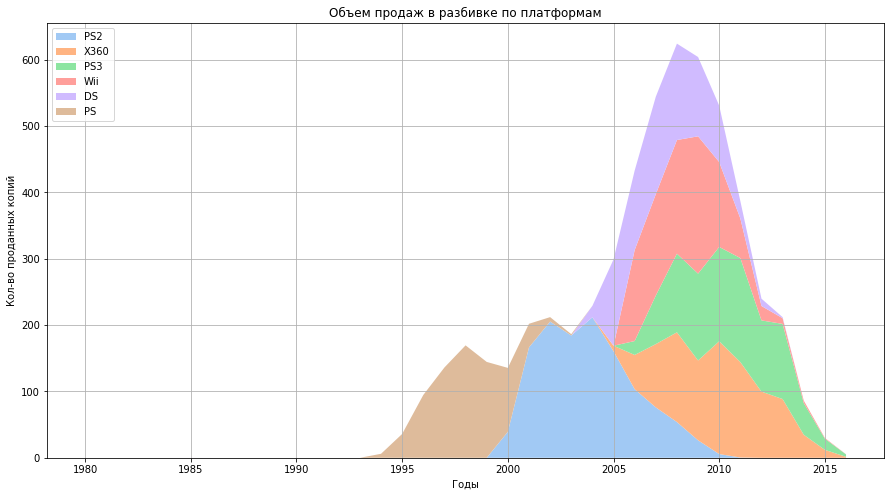

In [31]:
# посмотрим на продажи первых 6 платформ в разбивке по годам
top_platform = pivot_games_platform.index[:6]

col = sns.color_palette('pastel') # задаем цветовую гамму
plt.figure(figsize=(15,8))
plt.stackplot(pivot_platform_years.index.values, 
              pivot_platform_years.loc[:, top_platform].T, 
              labels=pivot_games_platform.index, 
              colors=col);
plt.legend(loc='upper left')
plt.grid()
plt.xlabel('Годы')
plt.ylabel('Кол-во проданных копий')
plt.title('Объем продаж в разбивке по платформам');

>По графику видно, что хоть первые 6 платформ и попали в топ по продажам за весь период, но уже в 2015г их выпуск сошел на нет. Также из графика ясно, что в среднем платформа живет около 10 лет. При этом максимум продаж совершается за первые пять лет. <br/>
Посмотрим сохраняется ли эта тенденция по всем платформам.

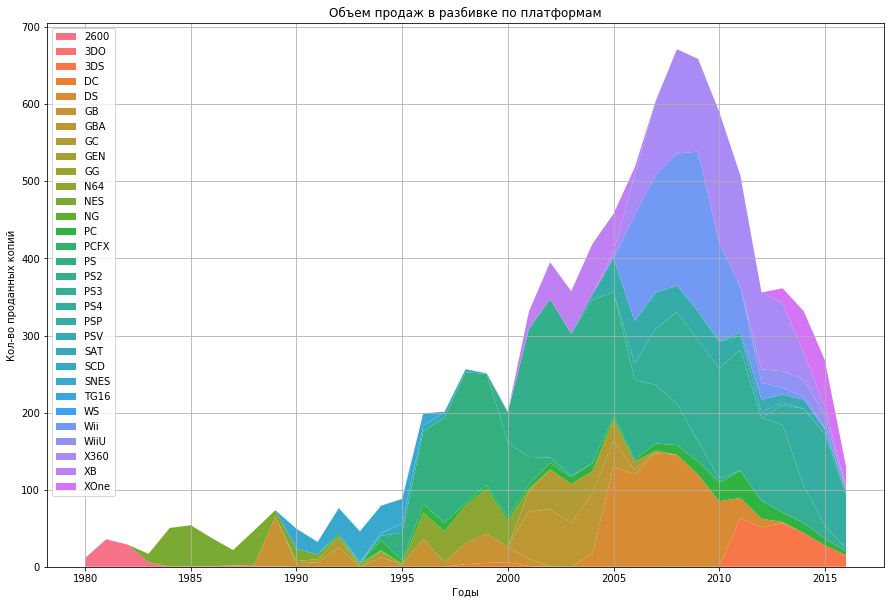

In [32]:
col = sns.color_palette('husl', n_colors=37)
plt.figure(figsize=(15,10))
plt.stackplot(pivot_platform_years.index.values, 
              pivot_platform_years.T, 
              labels=pivot_platform_years.columns, 
              colors=col);
plt.legend(loc='upper left')
plt.grid()
plt.xlabel('Годы')
plt.ylabel('Кол-во проданных копий')
plt.title('Объем продаж в разбивке по платформам');

>Если смотреть начиная с 2000х, то видно, что тенденция срока жизни платформы и максимума продаж сохраняется.<br/>
В связи с этим для построения прогноза на 2017г можно взять данные не за весь период, а только с 2015г. 

<b><font size=3>Промежуточный вывод:</font></b><br/>

Выяснили, что в среднем платформа живет 10 лет. При этом максимум продаж игр каждой платформы в течение первых 5 лет.
Нашли актуальный период для дальнейшего анализа и построения прогноза. Берем данные не за все года, а начиная с 2015г.

<b><font size=4>3.2. Анализ платформ за актуальный период</font></b><a name="3.2."></a><br/>
[<font size="2">(к содержанию)</font>](#1common.)

In [33]:
# создадим срез данных начиная с 2015г.

games_actual = games.loc[games['year_of_release'] > 2014]
general_info(games_actual)

Случайные 5 строк датафрейма
----------------------------


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
12670,BlazBlue Central Fiction,PS3,2016,Fighting,0.02,0.02,0.02,0.01,999.0,100.0,T,0.07
13918,Gal Gun: Double Peace,PSV,2015,Action,0.00,0.02,0.01,0.01,999.0,8.1,M,0.04
1097,Until Dawn,PS4,2015,Adventure,0.45,0.90,0.05,0.26,79.0,8.2,M,1.66
13143,Steins;Gate 0,PS4,2015,Adventure,0.00,0.00,0.05,0.00,81.0,8.3,M,0.05
13000,Dead Island Definitive Collection,XOne,2016,Action,0.02,0.03,0.00,0.00,67.0,4.9,M,0.05


Общая информация
----------------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1108 entries, 31 to 16714
Data columns (total 12 columns):
name               1108 non-null category
platform           1108 non-null object
year_of_release    1108 non-null int16
genre              1108 non-null category
na_sales           1108 non-null float32
eu_sales           1108 non-null float32
jp_sales           1108 non-null float32
other_sales        1108 non-null float32
critic_score       1108 non-null float32
user_score         1108 non-null float32
rating             1108 non-null object
all_sales          1108 non-null float32
dtypes: category(2), float32(7), int16(1), object(2)
memory usage: 471.3+ KB


None

Пропуски
--------


,0
name,0
platform,0
year_of_release,0
genre,0
na_sales,0
eu_sales,0
jp_sales,0
other_sales,0
critic_score,0
user_score,0


Дубликаты
---------


0

Описательная статистика
-----------------------


,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,all_sales
count,1108.00,1108.00,1108.00,1108.00,1108.00,1108.00,1108.00,1108.00
mean,2015.45,0.14,0.13,0.05,0.04,617.07,439.93,0.36
std,0.50,0.40,0.43,0.17,0.13,456.11,486.82,0.94
min,2015.00,0.00,0.00,0.00,0.00,19.00,0.20,0.01
25%,2015.00,0.00,0.00,0.00,0.00,77.00,7.00,0.03
50%,2015.00,0.01,0.02,0.01,0.00,999.00,8.95,0.08
75%,2016.00,0.09,0.09,0.04,0.02,999.00,999.00,0.26
max,2016.00,6.03,6.12,2.79,2.38,999.00,999.00,14.63


>Осталось такое же большое количество пропусков в столбцах critic_score и rating. 
Снова видим огромный максимум по продажам в разных странах.

Проанализируем какие платформы лидируют по продажам, растут или падают и выберем несколько потенциально прибыльных платформ. Также удалим из рассмотрения платформы, по которым продажи закончились, если такие есть в нашем обновленном датасете.

In [34]:
max_year = games_actual['year_of_release'].max() # выбираем последний год

# создаем список платформ, в которых были продажи в 2016г
platforms_actual = games_actual.loc[(games_actual['all_sales']>0) & (games_actual['year_of_release'] == max_year)]\
                                .groupby('platform')['all_sales'].sum()\
                                .sort_values(ascending=False) 

print('Сумма проданных копий в 2016г по каждой платформе')
print('-------------------------------------------------')
platforms_actual

Сумма проданных копий в 2016г по каждой платформе
-------------------------------------------------


platform
PS4     69.25
XOne    26.15
3DS     15.14
PC       5.25
WiiU     4.60
PSV      4.25
PS3      3.60
X360     1.52
Wii      0.18
Name: all_sales, dtype: float32

>Всего 9 платформ. Оставим только их в таблице, т.к. по остальным продажи закончились и смысла нет составлять для них прогноз.

In [35]:
# обновим датасет, оставив только 9 платформ
games_actual = games_actual.loc[games_actual['platform'].isin(platforms_actual.index)]

# посмотрим продажи за 2015-2016гг
print('Сумма проданных копий в 2015-2016гг по каждой платформе')
print('-------------------------------------------------------')
games_actual.groupby('platform')['all_sales'].sum().sort_values(ascending=False)

Сумма проданных копий в 2015-2016гг по каждой платформе
-------------------------------------------------------


platform
PS4     188.149994
XOne     86.290001
3DS      42.920002
WiiU     20.949999
PS3      20.420000
PC       13.770000
X360     13.480000
PSV      10.500000
Wii       1.320000
Name: all_sales, dtype: float32

>Лидер по продажам платформа PS4, немного отстает XOne. Построим боксплоты для каждой платформы.

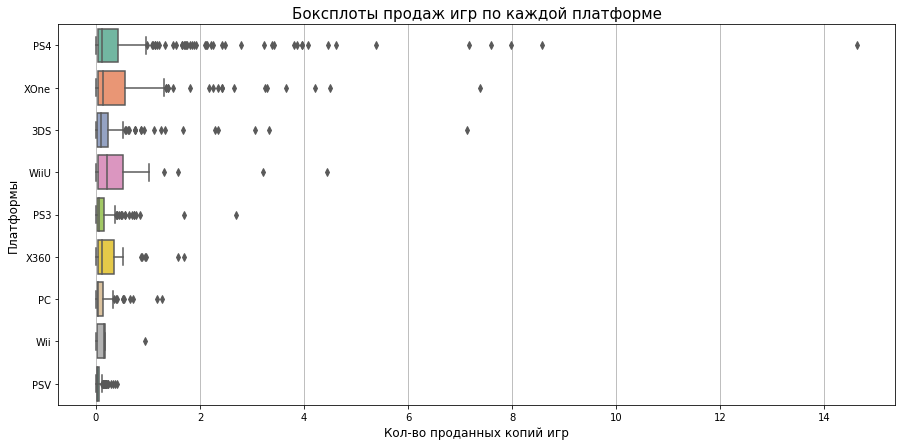

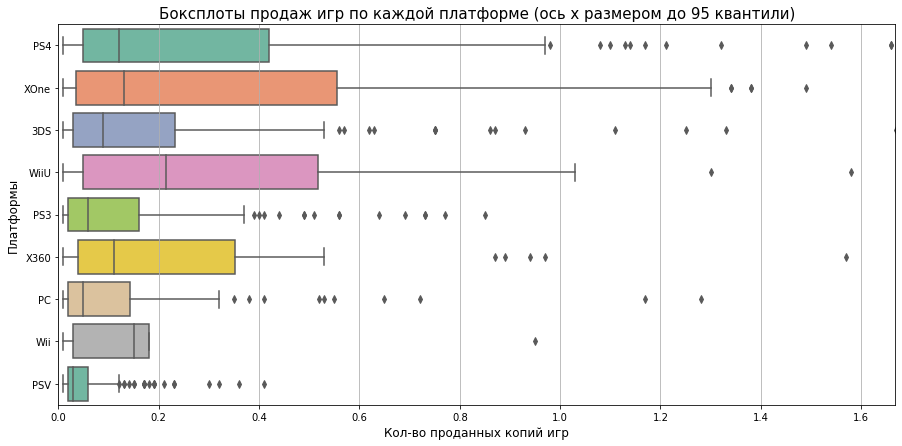

In [36]:
# строим боксплоты для каждой платформы
plt.figure(figsize=(15,7))

ax = sns.boxplot(data=games_actual, x='all_sales', y='platform', palette='Set2')
ax.grid(axis = 'x')
ax.set_title('Боксплоты продаж игр по каждой платформе', fontsize=15)
ax.set_xlabel('Кол-во проданных копий игр', fontsize=12)
ax.set_ylabel('Платформы', fontsize=12)

# строим боксплоты для каждой платформы, ограничив ось х для рассмотрения границ квантилей
plt.figure(figsize=(15,7))

ax = sns.boxplot(data=games_actual, x='all_sales', y='platform', palette='Set2')
ax.grid(axis = 'x')
ax.set_xlim(0, games_actual['all_sales'].quantile(.95)) # ограничиваем ось х
ax.set_title('Боксплоты продаж игр по каждой платформе (ось х размером до 95 квантили)', fontsize=15)
ax.set_xlabel('Кол-во проданных копий игр', fontsize=12)
ax.set_ylabel('Платформы', fontsize=12);

>У первых 4х игр (PS4, XOne, 3DS, WiiU) 75% игр продаются до 1.4 млн.копий. 50% значений всех проданных копий по всем платформам не превышает 0.6 млн. Но у этих платформ очень много выбросов - игр, которые продаются более 1 млн копий. Думаю, что это очень популярные, хитовые игры. <br/>
У остальных платформ хитовых игр меньше и, соответственно, меньше общий объем продаж.<br/>
Посмотрим на примеры таких популярных игр.

In [37]:
games_actual.loc[(games_actual['platform'] =='XOne') & (games_actual['all_sales'] > 5)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
99,Call of Duty: Black Ops 3,XOne,2015,Shooter,4.59,2.11,0.01,0.68,999.0,999.0,no rating ESRB,7.39


>В играх я не сильна, но википедия пишет, что игра действительно довольно популярна.


<b><font size=3>Промежуточный вывод:</font></b><br/>

Из 37 платформ только у 9ти были продажи в 2016г. Поэтому остальные платформы, у которых не было продаж, удалили из рассмотрения. Самая популярная платформа, судя по кол-ву проданных копий за 2015-2016гг,  это PS4. Также нашли, что у каждой платформы есть выбросы - хитовые игры. В связи с популярностью этих игр, не думаю, что их нужно удалять из рассмотрения.

<b><font size=4>3.3. Продажи наиболее популярной платформы PS4</font></b><a name="3.3."></a><br/>
[<font size="2">(к содержанию)</font>](#1common.)

Посмотрим как влияют на продажи PS4 отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами.

In [38]:
# создаем датасет по продажам на платформе PS4

ps4_sales = games_actual.loc[(games_actual['platform'] =='PS4'), ['all_sales', 'critic_score', 'user_score']]
ps4_sales_notnull = ps4_sales.loc[(ps4_sales['critic_score']!=999) 
                                  & (ps4_sales['user_score']!=999) 
                                  & (ps4_sales['user_score']!=100)] # убираем пустые значения и 
                                                                    # те игры, где оценка не определена

print('Данные по платформе PS4')
print('-----------------------')
ps4_sales_notnull.head()

Данные по платформе PS4
-----------------------


,all_sales,critic_score,user_score
77,8.58,82.0,4.3
94,7.60,85.0,5.0
105,7.17,87.0,6.5
171,5.39,93.0,7.9
231,4.62,86.0,8.1


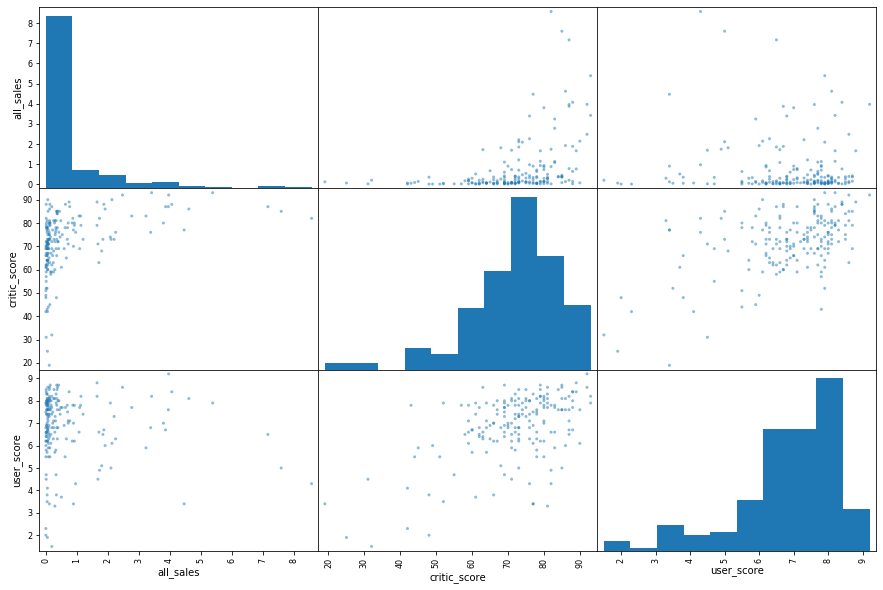

In [39]:
# строим диаграммы рассеяния

pd.plotting.scatter_matrix(ps4_sales_notnull, figsize=(15, 10));


>Видим, в основном продажи остаются на определенном уровне, вне зависимости от оценок критиков и пользователей. Но есть продажи, которые растут с ростом оценки критиков по данной платформе. Причем продажи растут, если оценка критиков начиная с 60 и выше. Эти продажи похожи на выбросы, т.е. популярные игры. Тоже самое и с оценкой пользователей, но в менее явном виде. 
Видим, также что чем выше оценка критика, тем выше и оценка пользователей.

Теперь посчитаем корреляцию между отзывами и продажами.

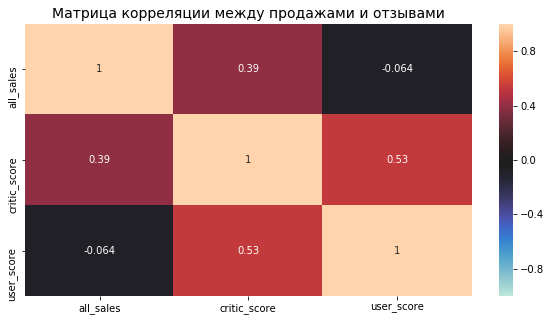

In [40]:
plt.figure(figsize=(10,5))
ax = sns.heatmap(ps4_sales_notnull.corr(), annot=True, vmin=-1, vmax=1, center=0)
ax.set_title('Матрица корреляции между продажами и отзывами', fontsize=14);

>Матрица корреляции показывает, что небольшое влияние на продажи PS4 оказывает оценка критиков и совсем никакого влияния не оказывает оценка пользователей. При этом оценки критиков и пользователей слабо коррелируют между собой.

<b><font size=3>Промежуточный вывод:</font></b><br/>

Проанализировав продажи по платформе PS4 выяснили, что в основном продажи остаются на определенном уровне, вне зависимости от оценок критиков и пользователей. Но есть продажи, которые растут с ростом оценки критиков по данной платформе. Причем продажи растут, если оценка критиков начиная с 60 и выше. Тоже самое и с оценкой пользователей, но в менее явном виде. Этот рост продаж связан с очень популярными играми.<br/>
Также, посчитав матрицу корреляции, увидели, что продажи слабо коррелируют с оценкой критиков и имеют практически нулевую корреляцию с оценкой пользователей.

Думаю, что этот вывод можно перенести на оставшиеся 8 платформ. Т.к. ранее выяснили, что объем продаж у этих платформ меньше, чем у PS4, но в пределах до 1 млн.проданных копий, также есть выбросы - популярные игры.


<b><font size=4>3.4. Анализ жанров</font></b><a name="3.4."></a><br/>
[<font size="2">(к содержанию)</font>](#1common.)

Посмотрим на общее распределение игр по жанрам.

In [41]:
# группируем данные по жанру и считаем кол-во выпущенных игр этого жанра и сумму продаж

genre_pivot = games_actual.pivot_table(index='genre',
                                       values='all_sales',
                                       aggfunc=('sum', 'count')).sort_values(by='sum', ascending=False)
genre_pivot.columns = ['games_count', 'all_sales'] # переименуем столбцы

print('Кол-во выпущенных игр и проданных копий в разбивке по жанрам')
print('------------------------------------------------------------')
genre_pivot

Кол-во выпущенных игр и проданных копий в разбивке по жанрам
------------------------------------------------------------


,games_count,all_sales
genre,,
Shooter,81,105.730003
Action,428,102.010002
Sports,107,64.330002
Role-Playing,132,55.820000
Misc,71,14.170000
Fighting,37,12.370000
Adventure,110,11.980000
Racing,42,10.860000
Platform,28,9.280000


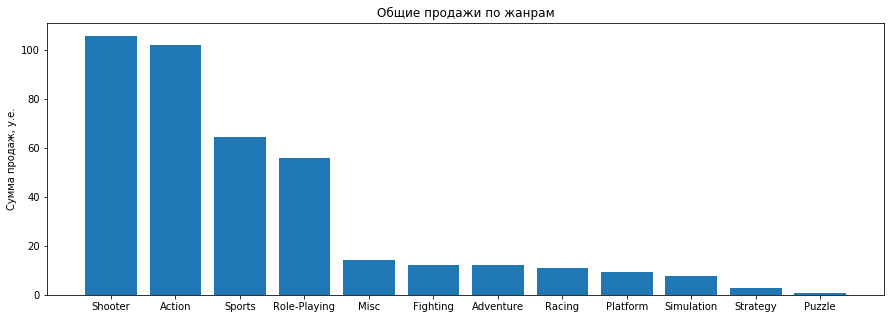

In [42]:
plt.figure(figsize =(15, 5))
plt.bar(genre_pivot.index.values, genre_pivot['all_sales'])
plt.xlabel('')
plt.ylabel('Сумма продаж, у.е.')
plt.title('Общие продажи по жанрам');

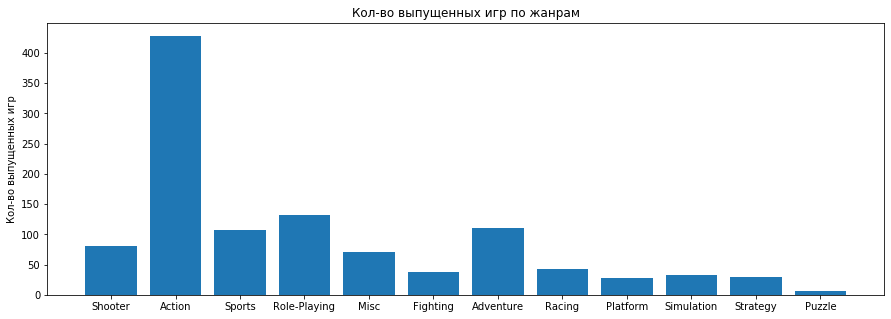

In [43]:
plt.figure(figsize =(15, 5))
plt.bar(genre_pivot.index.values, genre_pivot['games_count'])
plt.xlabel('')
plt.ylabel('Кол-во выпущенных игр')
plt.title('Кол-во выпущенных игр по жанрам');

>Основная часть игр имеет жанр Action, остальные жанры представлены в гораздо меньшем количестве. Максимальные продажи имеют жанры Shooter и Action. При этом кол-во игр с жанром Shooter не на первом месте, их 81.
Самые низкие продажи имеют жанры Strategy и Puzzle.<br/>
Т.к. количество игр и общие продажи по жанрам отличаются рассмотрим медианные продажи, чтобы понять какие игры продаются лучше.

In [44]:
print('Медианные продажи по жанрам')
print('---------------------------')

games_actual.pivot_table(index='genre',
                        values='all_sales',
                        aggfunc='median').sort_values(by='all_sales', ascending=False)

Медианные продажи по жанрам
---------------------------


,all_sales
genre,
Shooter,0.380
Sports,0.120
Role-Playing,0.115
Platform,0.100
Simulation,0.100
Fighting,0.090
Action,0.060
Misc,0.060
Racing,0.055


>При рассмотрении медианных продаж, выясняется, что жанр Shooter остается в топе продаж и добавляются жанры Sports и Role-Playing, а вот жанр Action спустился на 7ю строчку.


<b><font size=3>Промежуточный вывод:</font></b><br/>

Изучив медианные продажи выяснили, что самые популярный жанр в играх - это Shooter. Затем идут жанры с небольшой разницей в продажах: Sports и Role-Playing. По ним больше всего продаж в актуальном периоде.

<b><font size=5>4. Составление портрета пользователя каждого региона</font></b><a name="4."></a><br/>
[<font size="2">(к содержанию)</font>](#1common.)

Определим для каждого региона самые популярные платформы (топ-5).

In [45]:
def get_info_top5(data, column):
    
    '''Функция принимает на вход датафрейм и название столбца, по которому должна происходить группировка.
    Далее группирует по указанному столбцу и считает продажи для каждого региона. Затем считает долю продаж.
    Результат записывает в словарь.
    '''
    
    results = {}
    regions = ['na_sales', 'eu_sales', 'jp_sales'] # создаем список регионов
    for region in regions:
        region_sales = data.pivot_table(index=column,
                                        values=region,
                                        aggfunc='sum').sort_values(by=region, ascending=False) # группируем по нужному столбцу
                                                                                                # и считаем общую сумму продаж
        sales_part = region_sales / region_sales.sum() # считаем долю продаж
        results[region] = sales_part.iloc[:5] # выводим только топ-5 строк
    
    for key in results.keys(): 
        if key == regions[0]:
            print('Продажи в Северной Америке')
            print('--------------------------')
        elif key == regions[1]:
            print('Продажи в Европе')
            print('----------------')
        else:
            print('Продажи в Японии')
            print('----------------')
        display(results[key])
    

In [46]:
top5_sales_dict = get_info_top5(games_actual, 'platform')

Продажи в Северной Америке
--------------------------


,na_sales
platform,
PS4,0.420713
XOne,0.331379
3DS,0.067923
WiiU,0.058370
X360,0.053034


Продажи в Европе
----------------


,eu_sales
platform,
PS4,0.564688
XOne,0.189942
PC,0.061511
3DS,0.049953
PS3,0.049344


Продажи в Японии
----------------


,jp_sales
platform,
3DS,0.442005
PS4,0.226164
PSV,0.157845
PS3,0.093281
WiiU,0.077327


>В Северной Америке наиболее популярными являются PS4 и XOne. Разница между ними небольшая. В Европе тоже эти две платформы наиболее популярны, но, у PS4 гораздо больше продаж, чем у XOne. Можно сказать, что в Европе лидирует в основном PS4.<br/>
А в Японии совсем другая ситуация. Самая популярная платформа здесь 3DS. PS4 на втором месте, а XOne вообще не входит в пятерку лидиров.


Теперь посмотрим самые популярные жанры.

In [47]:
# посчитаем доли продаж для каждого жанра
top5_genre_dict = get_info_top5(games_actual, 'genre')

Продажи в Северной Америке
--------------------------


,na_sales
genre,
Shooter,0.317412
Action,0.221885
Sports,0.173332
Role-Playing,0.130575
Misc,0.036761


Продажи в Европе
----------------


,eu_sales
genre,
Shooter,0.272273
Action,0.235366
Sports,0.188049
Role-Playing,0.116331
Racing,0.044072


Продажи в Японии
----------------


,jp_sales
genre,
Action,0.430368
Role-Playing,0.251689
Shooter,0.071134
Misc,0.059872
Adventure,0.041667


>По жанрам ситуация также похожа в Северной Америке и в Европе. Наиболее популярные жанры здесь Shooter и Action. Причем, в Европе доли продаж этих жанров практически равны.<br/>
А вот в Японии самый популярный жанр - это Action, немного отстает жанр Role-Playing. А вот Shooter только на третьем месте.

Теперь проанализируем рейтинг  ESRB для каждого региона.


In [48]:
# посчитаем доли продаж для каждого рейтинга
top5_rating_dict = get_info_top5(games_actual, 'rating')

Продажи в Северной Америке
--------------------------


,na_sales
rating,
M,0.309836
no rating ESRB,0.246657
E,0.175176
T,0.150603
E10+,0.117728


Продажи в Европе
----------------


,eu_sales
rating,
M,0.307828
no rating ESRB,0.241382
E,0.235433
T,0.137353
E10+,0.078005


Продажи в Японии
----------------


,jp_sales
rating,
no rating ESRB,0.615053
T,0.144520
E,0.098536
M,0.080518
E10+,0.061374


>Снова похожие ситуации в Европе и Северной Америке. Наиболее ходовые игры имеют рейтинг для взрослых. На втором месте по продажам игры,у которых нет рейтинга, и на третьем месте - для всех.<br/>
А в Японии у 60% игр нет рейтинга, самый популярный рейтинг изтех игр,у которых он проставлен, T - для подростков. И мало отличаются по продажам игры для всех и для взрослых.

>* «EC» («Early childhood») — «Для детей младшего возраста»: Игра подходит для детей от 3 лет и старше.
>* «E» («Everyone») — «Для всех»: Содержание вполне подходит для возрастной категории от 6 лет и старше.
* «E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше».
* «T» («Teen») — «Подросткам»: Игра подходит для лиц от 13 лет и старше.
* «M» («Mature») — «Для взрослых»: Материалы игры не подходят для подростков младше 17 лет.
* «AO» («Adults Only 18+») — «Только для взрослых».

<b><font size=3>Промежуточный вывод:</font></b><br/>

Проанализировав топ-5 наиболее популярных платформ, жанров и рейтингов для каждого региона выяснили, что портреты пользователя похожи в Европе и Северной Америке и отличаются от портрета в Японии.

*Портрет пользователя в Северной Америке:*<br/>

* Наиболее популярные платформы с небольшой разницей в продажах: PS4 и XOne.
* Наиболее популярные жанры: Shooter и Action, опять же с небольшой разницей.
* Наиболее популярные рейтинги: «Для взрослых», затем идут  «Для всех», «Подросткам» и «Для всех от 10 лет и старше». При этом у 24% всех игр рейтинг не проставлен.


*Портрет пользователя в Европе:*<br/>

* Наиболее популярные платформы: PS4, затем XOne с большой разницей в продажах.
* Наиболее популярные жанры: Shooter и Action с небольшой разницей.
* Наиболее популярные рейтинги: «Для взрослых» и «Для всех», затем идут «Подросткам» и «Для всех от 10 лет и старше». При этом у 24% всех игр рейтинг не проставлен.


*Портрет пользователя в Японии:*<br/>

* Наиболее популярные платформы: 3DS, затем с большой разницей в продажах идет PS4, а XOne вообще не попала в пятерку лидиров.
* Наиболее популярные жанры: Action, затем Role-Playing.
* Наиболее популярные рейтинги: «Подросткам», затем идут «Для всех»,  «Для взрослых» и «Для всех от 10 лет и старше». Но у 61% игр нет рейтинга.

<b><font size=5>5. Проверка гипотез</font></b><a name="5."></a>

<b><font size=4>5.1. Гипотеза о равенстве средних пользовательских рейтингов платформ Xbox One и PC</font></b><a name="5.1."></a><br/>
[<font size="2">(к содержанию)</font>](#1common.)

Для начала проверим одинаковые ли дисперсии у выборок, применив тест Левена. <br/>
Гипотеза $H_0$: Дисперсии средних пользовательских рейтингов для платформ Xbox One и PC равны.<br/>
Гипотеза $H_1$: Дисперсии средних пользовательских рейтингов для платформ Xbox One и PC не равны.

Затем проверим равенство средних пользовательских рейтингов для платформ Xbox One и PC. <br/>
<b>Нулевая гипотеза:</b> *средние пользовательские рейтинги для платформ Xbox One и PC не отличаются.* <br/>
<b>Альтернативная гипотеза:</b> *средние пользовательские рейтинги для платформ Xbox One и PC отличаются.*

In [49]:
# удалим из столбца user_score значения 999 (пропуски) и 100 (рейтинг не определен) 

user_score_xone = games_actual.loc[(games_actual['user_score']!=999) 
                                       & (games_actual['user_score']!=100) 
                                       & (games_actual['platform']=='XOne'), 'user_score'] # датасет для платформы XOne

user_score_pc = games_actual.loc[(games_actual['user_score']!=999) 
                                       & (games_actual['user_score']!=100) 
                                       & (games_actual['platform']=='PC'), 'user_score'] # датасет для платформы PC

In [50]:
def equal_means(a,b, alpha = 0.05):
    
    '''Функция сначала применяет тест Левена к двум выборка для проверки равенства дисперсий.
    Затем исходя из равенства/различия дисперсий применяет к этим выборкам t-test.
    '''
    
    results_levene = st.levene(a, b) # применяем тест Левена для проверки равенства дисперсий
    print('p-значение:', results_levene.pvalue)
    
    if results_levene.pvalue < alpha:
        print(colored("Отвергаем нулевую гипотезу (о дисперсии)", 'red'))
        equal_var = False # дисперсии выборок не равны
    else: 
        print(colored("Не можем отвергнуть нулевую гипотезу (о дисперсии)", 'green'))
        equal_var = True # дисперсии выборок равны
        
    # проверка гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам
    results = st.ttest_ind(a, b, equal_var=equal_var) 
    print('p-значение:', results.pvalue)
    
    if results.pvalue < alpha:
        print(colored("Отвергаем нулевую гипотезу", 'red'))
    else: 
        print(colored("Не можем отвергнуть нулевую гипотезу", 'green'))

In [51]:
# применяем написанную функцию к выборкам по двум платформам

equal_means(user_score_xone, user_score_pc, alpha = 0.05)

p-значение: 0.07122245031087827
Не можем отвергнуть нулевую гипотезу (о дисперсии)
p-значение: 0.2778538240301606
Не можем отвергнуть нулевую гипотезу


>Согласно тесту Левена параметр для т-теста выбираем равным True.<br/>
Тест Стьюдента не смог отвергнуть нулевую гипотезу. А это значит, что различие в средних пользовательских рейтингах между платформами Xbox One и PC в почти 28% случаев можно получить случайным. Это слишком большая вероятность, чтобы делать вывод о значимом различии между средними пользовательскими рейтингами этих платформ.
Посмотрим на средние значения пользовательских рейтингов для этих платформ, посчитанные по данной выборке.

In [52]:
print('Средний рейтинг для платформы XOne:', round(user_score_xone.mean(),2))
print('Средний рейтинг для платформы PC:', round(user_score_pc.mean(),2))

Средний рейтинг для платформы XOne: 6.54
Средний рейтинг для платформы PC: 6.3


>Если посчитать средний рейтинг по каждой платформе, то у XOne рейтинг немного выше. Но нельзя сказать, что это различие значимо, судя по тесту Стьюдента.

<b><font size=3>Промежуточный вывод:</font></b><br/>

Для сравнения средних пользовательских рейтингов по платформам  Xbox One и PC  воспользовались тестом st.ttest_ind, который проверяет гипотезу о равенстве среднего двух генеральных совокупностей по взятым из них выборкам. Согласно тесту различие в средних пользовательских рейтингах между платформами Xbox One и PC в почти 28% случаев можно получить случайным. Не удалось отвергнуть нулевую гипотезу о равенстве средних пользовательских рейтингов этих платформ.

<b><font size=4>5.2. Гипотеза о равенстве средних пользовательских рейтингов жанров Action и Sports</font></b><a name="5.2."></a><br/>
[<font size="2">(к содержанию)</font>](#1common.)

In [53]:
genre_action = games_actual.loc[(games_actual['user_score']!=999) 
                                & (games_actual['user_score']!=100) 
                                & (games_actual['genre'] == 'Action'), 'user_score'] # выборка с жанром Action
genre_sports = games_actual.loc[(games_actual['user_score']!=999) 
                                & (games_actual['user_score']!=100)
                                & (games_actual['genre'] == 'Sports'), 'user_score'] # выборка с жанром Sports

Снова проверим одинаковые ли дисперсии у выборок, применив тест Левена. <br/>
Гипотеза $H_0$: Дисперсии средних пользовательских рейтингов для платформ Xbox One и PC равны.<br/>
Гипотеза $H_1$: Дисперсии средних пользовательских рейтингов для платформ Xbox One и PC не равны.

Затем проверим равенство средних пользовательских рейтингов для жанров Action и Sports. <br/>
<b>Нулевая гипотеза:</b> *средние пользовательские рейтинги для жанров Action и Sports не отличаются.* <br/>
<b>Альтернативная гипотеза:</b> *средние пользовательские рейтинги для жанров Action и Sports отличаются.*

In [54]:
# проверяем гипотезы

equal_means(genre_action, genre_sports, alpha = 0.05)

p-значение: 1.0600388022961123e-05
Отвергаем нулевую гипотезу (о дисперсии)
p-значение: 5.971647204081296e-10
Отвергаем нулевую гипотезу


>Согласно тесту Левена параметр для т-теста выбираем False. По т-тесту отвергаем нулевую гипотезу о равенстве средних рейтингов для жанров Action и Sports.<br/>
Посчитаем средние рейтинги для этих жанров.

In [55]:
print('Средний рейтинг для жанра Action:', round(genre_action.mean(),2))
print('Средний рейтинг для жанра Sports:', round(genre_sports.mean(),2))

Средний рейтинг для жанра Action: 6.81
Средний рейтинг для жанра Sports: 5.2


>Видим, что средние рейтинги отличаются. У жанра Action средний рейтинг выше.

<b><font size=3>Промежуточный вывод:</font></b><br/>

Для сравнения средних пользовательских рейтингов для жанров Action и Sports  воспользовались тестом st.ttest_ind, который проверяет гипотезу о равенстве среднего двух генеральных совокупностей по взятым из них выборкам. Согласно т-тесту отвергаем нулевую гипотезу о равенстве средних рейтингов для жанров Action и Sports. Также, если посчитать средние рейтинги по этим жанрам, то они существенно различаются.

<b><font size=5>6. Общий вывод</font></b><a name="6."></a><br/>
[<font size="2">(к содержанию)</font>](#1common.)

<b>Проанализировав продажи игр по 31 платформе с 1980 по 2016гг было выяснено, что:</b>

* В среднем платформа живет 10 лет, после чего прекращаются продажи игр по ней, т.к. появляются новые. В среднем через 5 лет наступает пик продаж, затем продажи начинают падать.
* Актуальный период для прогнозирования продаж на 2017г был взят с 2015 по 2016гг.
* В актульном периоде всего по 9 платформам были продажи. Они и были взяты для дальнейшего анализа.
* Самая популярная платформа, судя по кол-ву проданных копий за 2015-2016гг, это PS4. Также нашли, что у каждой платформы есть выбросы - хитовые игры.
* Продажи практически не зависят от оценок пользователей и критиков. Но есть продажи, которые растут с ростом оценки критиков. Причем продажи растут, если оценка критиков начиная с 60 и выше. 
* При рассмотрении медианных продаж, увидели, что в топе продаж жанр Shooter и жанры Sports, Role-Playing

Проанализировав портреты пользователей для каждого региона, были вяывлены закономерности, определяющие успешность игры для каждого региона.

*Портрет пользователя в Северной Америке:*<br/>

* Наиболее популярные платформы с небольшой разницей в продажах: PS4 и XOne.
* Наиболее популярные жанры: Shooter и Action, опять же с небольшой разницей.
* Наиболее популярные рейтинги: «Для взрослых», затем идут  «Для всех», «Подросткам» и «Для всех от 10 лет и старше». При этом у 24% всех игр рейтинг не проставлен.


*Портрет пользователя в Европе:*<br/>

* Наиболее популярные платформы: PS4, затем XOne с большой разницей в продажах.
* Наиболее популярные жанры: Shooter и Action с небольшой разницей.
* Наиболее популярные рейтинги: «Для взрослых» и «Для всех», затем идут «Подросткам» и «Для всех от 10 лет и старше». При этом у 24% всех игр рейтинг не проставлен.


*Портрет пользователя в Японии:*<br/>

* Наиболее популярные платформы: 3DS, затем с большой разницей в продажах идет PS4, а XOne вообще не попала в пятерку лидиров.
* Наиболее популярные жанры: Action, затем Role-Playing.
* Наиболее популярные рейтинги: «Подросткам», затем идут «Для всех»,  «Для взрослых» и «Для всех от 10 лет и старше». Но у 61% игр нет рейтинга.

<b>Проверка гипотез:</b>

Гипотезу о равенстве средних пользовательских рейтингов платформ Xbox One и PC отвергнуть не удалось. Тест Стьюдента показал, что различие в средних пользовательских рейтингах между платформами Xbox One и PC в почти 28% случаев можно получить случайным. <br/> А вот гипотезу о равенстве средних рейтингов для жанров Action и Sports удалось отвергнуть. Также, если посчитать средние рейтинги по этим жанрам, то они существенно различаются.

<b>Была продела сл.работа с данными:</b>

* Во многих столбцах изменены типы данных на соответствующие данным в столбце и для того, чтобы снизить потребление памяти.
* Удалены пропуски в столбцах Name, Year_of_Release и Genre, т.к. они составляли менее 2% от всего датасета. Пропуски в user_score, rating, critic_score оставлены без изменений.
* посчитали суммарные продажи по всем регионам


<b>Рекомендации:</b>

Для Европы и Северной Америки: в связи с популярностью платформ PS4 и XOne, а также жанров Shooter и Action рекомендуется скорректировать рекламный бюджет в их пользу.<br/>
Для Японии: скорректировать рекламный бюджет в пользу платформы 3DS и жанров Action, Role-Playing.
